In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import sklearn
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs
from sklearn.metrics import log_loss

encoder = preprocessing.LabelEncoder()

In [2]:
data = pd.read_csv('cvd/data1.csv')
#data = data.drop('id',axis=1)
data = data.fillna(np.nan,axis=0)
data['location'] = encoder.fit_transform(data['location'].astype(str))
data['country'] = encoder.fit_transform(data['country'].astype(str))
data['gender'] = encoder.fit_transform(data['gender'].astype(str))
data

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,1,116,8,1,66.0,1/3/2020,1/11/2020,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,113,8,0,56.0,1/15/2020,1/15/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,154,8,1,46.0,1/4/2020,1/17/2020,0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,129,8,0,60.0,NaN,NaN,1,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,129,8,1,58.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,53,3,2,24.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1081,1082,0,0,2,35.0,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1082,1083,3,1,1,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1083,1084,25,9,1,NaN,NaN,NaN,0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data['symptom1'] = encoder.fit_transform(data['symptom1'].astype(str))
data['symptom2'] = encoder.fit_transform(data['symptom2'].astype(str))
data['symptom3'] = encoder.fit_transform(data['symptom3'].astype(str))
data['symptom4'] = encoder.fit_transform(data['symptom4'].astype(str))
data['symptom5'] = encoder.fit_transform(data['symptom5'].astype(str))
data['symptom6'] = encoder.fit_transform(data['symptom6'].astype(str))

In [4]:
data['sym_on'] = pd.to_datetime(data['sym_on'])
data['hosp_vis'] = pd.to_datetime(data['hosp_vis'])
data['sym_on']= data['sym_on'].map(dt.datetime.toordinal)
data['hosp_vis']= data['hosp_vis'].map(dt.datetime.toordinal)
data['diff_sym_hos']= data['hosp_vis'] - data['sym_on']

In [5]:
data.info

<bound method DataFrame.info of         id  location  country  gender   age  sym_on  hosp_vis  vis_wuhan  \
0        1       116        8       1  66.0  737427    737435          1   
1        2       113        8       0  56.0  737439    737439          0   
2        3       154        8       1  46.0  737428    737441          0   
3        4       129        8       0  60.0       1         1          1   
4        5       129        8       1  58.0       1         1          0   
...    ...       ...      ...     ...   ...     ...       ...        ...   
1080  1081        53        3       2  24.0       1         1          0   
1081  1082         0        0       2  35.0       1         1          0   
1082  1083         3        1       1   NaN       1         1          0   
1083  1084        25        9       1   NaN       1         1          0   
1084  1085        15       31       1  70.0       1         1          0   

      from_wuhan  death  recov  symptom1  symptom2  sym

In [6]:
data = data.drop(['sym_on','hosp_vis'],axis=1)

In [7]:
print(data.dtypes)

id                int64
location          int32
country           int32
gender            int32
age             float64
vis_wuhan         int64
from_wuhan      float64
death             int64
recov             int64
symptom1          int32
symptom2          int32
symptom3          int32
symptom4          int32
symptom5          int32
symptom6          int32
diff_sym_hos      int64
dtype: object


In [8]:
data

,id,location,country,gender,age,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,1,116,8,1,66.0,1,0.0,0,0,17,31,23,12,3,1,8
1,2,113,8,0,56.0,0,1.0,0,0,17,31,23,12,3,1,0
2,3,154,8,1,46.0,0,1.0,0,0,17,31,23,12,3,1,13
3,4,129,8,0,60.0,1,0.0,0,0,17,31,23,12,3,1,0
4,5,129,8,1,58.0,0,0.0,0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,53,3,2,24.0,0,0.0,0,0,17,31,23,12,3,1,0
1081,1082,0,0,2,35.0,0,0.0,0,0,17,31,23,12,3,1,0
1082,1083,3,1,1,NaN,0,0.0,0,0,17,31,23,12,3,1,0
1083,1084,25,9,1,NaN,0,0.0,0,0,17,31,23,12,3,1,0


In [9]:
data['age'] = data['age'].fillna(value=data['age'].mean())

In [10]:
#data=data.dropna(subset=['from_wuhan'])
data['from_wuhan'] = data['from_wuhan'].fillna(value=0)

In [11]:
data.isna().sum()

id              0
location        0
country         0
gender          0
age             0
vis_wuhan       0
from_wuhan      0
death           0
recov           0
symptom1        0
symptom2        0
symptom3        0
symptom4        0
symptom5        0
symptom6        0
diff_sym_hos    0
dtype: int64

In [12]:
data

,id,location,country,gender,age,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,1,116,8,1,66.000000,1,0.0,0,0,17,31,23,12,3,1,8
1,2,113,8,0,56.000000,0,1.0,0,0,17,31,23,12,3,1,0
2,3,154,8,1,46.000000,0,1.0,0,0,17,31,23,12,3,1,13
3,4,129,8,0,60.000000,1,0.0,0,0,17,31,23,12,3,1,0
4,5,129,8,1,58.000000,0,0.0,0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,53,3,2,24.000000,0,0.0,0,0,17,31,23,12,3,1,0
1081,1082,0,0,2,35.000000,0,0.0,0,0,17,31,23,12,3,1,0
1082,1083,3,1,1,49.483689,0,0.0,0,0,17,31,23,12,3,1,0
1083,1084,25,9,1,49.483689,0,0.0,0,0,17,31,23,12,3,1,0


In [13]:
#################

In [14]:
trdata = pd.read_csv('cvd/train.csv')
#trdata = trdata.drop('id',axis=1)
trdata = trdata.fillna(np.nan,axis=0)
trdata['location'] = encoder.fit_transform(trdata['location'].astype(str))
trdata['country'] = encoder.fit_transform(trdata['country'].astype(str))
trdata['gender'] = encoder.fit_transform(trdata['gender'].astype(str))
trdata

,id,location,country,gender,age,sym_on,hosp_vis,vis_wuhan,from_wuhan,death,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6
0,49,38,2,1,61.0,12/20/2019,12/27/2019,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
1,50,38,2,1,69.0,12/30/2019,1/3/2020,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,51,38,2,1,89.0,NaN,NaN,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,52,38,2,1,89.0,1/13/2020,1/13/2020,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,53,38,2,1,66.0,1/10/2020,1/16/2020,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,1033,2,3,2,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
218,1034,22,6,2,NaN,NaN,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
219,1035,22,6,2,NaN,NaN,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
220,1036,22,6,2,NaN,NaN,NaN,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
tid=trdata['id']
tid

0        49
1        50
2        51
3        52
4        53
       ... 
217    1033
218    1034
219    1035
220    1036
221    1037
Name: id, Length: 222, dtype: int64

In [16]:
#pd=data.iloc[[tid],:]
dftr=data.loc[data['id'].isin(tid)]

In [17]:
dftr

,id,location,country,gender,age,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
48,49,147,8,1,61.000000,0,1.0,1,0,17,31,23,12,3,1,7
49,50,147,8,1,69.000000,0,1.0,1,0,17,31,23,12,3,1,4
50,51,147,8,1,89.000000,0,1.0,1,0,17,31,23,12,3,1,0
51,52,147,8,1,89.000000,0,1.0,1,0,17,31,23,12,3,1,0
52,53,147,8,1,66.000000,0,1.0,1,0,17,31,23,12,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,1033,27,10,2,49.483689,0,0.0,0,1,17,31,23,12,3,1,0
1033,1034,102,16,2,49.483689,0,0.0,1,0,17,31,23,12,3,1,0
1034,1035,102,16,2,49.483689,0,0.0,1,0,17,31,23,12,3,1,0
1035,1036,102,16,2,49.483689,0,0.0,1,0,17,31,23,12,3,1,0


In [18]:
Xtr=dftr.copy()
ytr=dftr['death'].copy()

In [19]:
Xtr=Xtr.drop(columns=['id','recov','death'])

In [20]:
Xtr

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
48,147,8,1,61.000000,0,1.0,17,31,23,12,3,1,7
49,147,8,1,69.000000,0,1.0,17,31,23,12,3,1,4
50,147,8,1,89.000000,0,1.0,17,31,23,12,3,1,0
51,147,8,1,89.000000,0,1.0,17,31,23,12,3,1,0
52,147,8,1,66.000000,0,1.0,17,31,23,12,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,27,10,2,49.483689,0,0.0,17,31,23,12,3,1,0
1033,102,16,2,49.483689,0,0.0,17,31,23,12,3,1,0
1034,102,16,2,49.483689,0,0.0,17,31,23,12,3,1,0
1035,102,16,2,49.483689,0,0.0,17,31,23,12,3,1,0


In [21]:
####

In [22]:
dftest=data.loc[~data['id'].isin(tid)]
dftest

,id,location,country,gender,age,vis_wuhan,from_wuhan,death,recov,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,1,116,8,1,66.000000,1,0.0,0,0,17,31,23,12,3,1,8
1,2,113,8,0,56.000000,0,1.0,0,0,17,31,23,12,3,1,0
2,3,154,8,1,46.000000,0,1.0,0,0,17,31,23,12,3,1,13
3,4,129,8,0,60.000000,1,0.0,0,0,17,31,23,12,3,1,0
4,5,129,8,1,58.000000,0,0.0,0,0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,53,3,2,24.000000,0,0.0,0,0,17,31,23,12,3,1,0
1081,1082,0,0,2,35.000000,0,0.0,0,0,17,31,23,12,3,1,0
1082,1083,3,1,1,49.483689,0,0.0,0,0,17,31,23,12,3,1,0
1083,1084,25,9,1,49.483689,0,0.0,0,0,17,31,23,12,3,1,0


In [23]:
dftest.value_counts(['death'])

death
0        863
Name: count, dtype: int64

In [24]:
Xtest=dftest.copy()
ytest=dftest['death'].copy()

In [25]:
Xtest=Xtest.drop(columns=['id','recov','death'])
Xtest

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,116,8,1,66.000000,1,0.0,17,31,23,12,3,1,8
1,113,8,0,56.000000,0,1.0,17,31,23,12,3,1,0
2,154,8,1,46.000000,0,1.0,17,31,23,12,3,1,13
3,129,8,0,60.000000,1,0.0,17,31,23,12,3,1,0
4,129,8,1,58.000000,0,0.0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.000000,0,0.0,17,31,23,12,3,1,0
1081,0,0,2,35.000000,0,0.0,17,31,23,12,3,1,0
1082,3,1,1,49.483689,0,0.0,17,31,23,12,3,1,0
1083,25,9,1,49.483689,0,0.0,17,31,23,12,3,1,0


In [26]:
###########Fisher Score

In [29]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

# Calculating scores
ind = fisher_score.fisher_score(Xtest.to_numpy(), ytest.to_numpy(), mode='index') 
ind

array([10, 11,  9,  8,  6,  7,  3,  1,  0,  2,  4, 12,  5], dtype=int64)

In [30]:
# Calculating scores
ranks = fisher_score.fisher_score(Xtest.to_numpy(), ytest.to_numpy(), mode='rank') 
ranks

array([ 2,  1,  3,  4,  6,  5,  9, 11, 12, 10,  8,  0,  7])

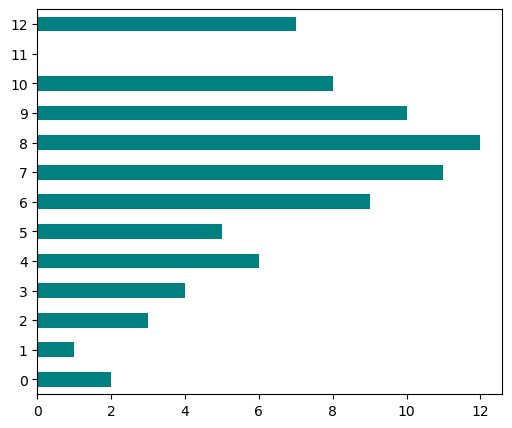

In [31]:
# Plotting the ranks
feat_importances = pd.Series(ranks)
feat_importances.plot(kind= 'barh', color='teal', figsize=(6,5))
plt.savefig('AdaBoostSimRank.png')
plt.show()

In [34]:
XFi2=Xtest.iloc[:,[8,7]]
XFi2

,symptom3,symptom2
0,23,31
1,23,31
2,23,31
3,23,31
4,23,31
...,...,...
1080,23,31
1081,23,31
1082,23,31
1083,23,31


In [35]:
XtrFi2=Xtr.iloc[:,[8,7]]
XtrFi2

,symptom3,symptom2
48,23,31
49,23,31
50,23,31
51,23,31
52,23,31
...,...,...
1032,23,31
1033,23,31
1034,23,31
1035,23,31


In [111]:
##############

In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=None)
#criterion='gini', max_depth=2, 

In [120]:
rfc.fit(XtrFi2,ytr)

RandomForestClassifier()

In [121]:
pred=rfc.predict(XFi2) #XFi2=test

In [122]:
from sklearn.metrics import recall_score as rs
from sklearn.metrics import precision_score as ps
from sklearn.metrics import f1_score as fs

In [123]:
recall = rs(ytest,pred)
precision = ps(ytest,pred)
f1 = fs(ytest,pred)
ma = rfc.score(XFi2,ytest)

C:\Users\ender1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
ma, f1, precision

(0.9745075318655851, 0.0, 0.0)

In [125]:
pred=rfc.predict(XFi2) #XFi2=test

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, pred)

0.9745075318655851

In [127]:
from sklearn.metrics import confusion_matrix
# creating a confusion matrix
cm = confusion_matrix(ytest, pred)
cm

array([[841,  22],
       [  0,   0]], dtype=int64)

[[841  22]
 [  0   0]]


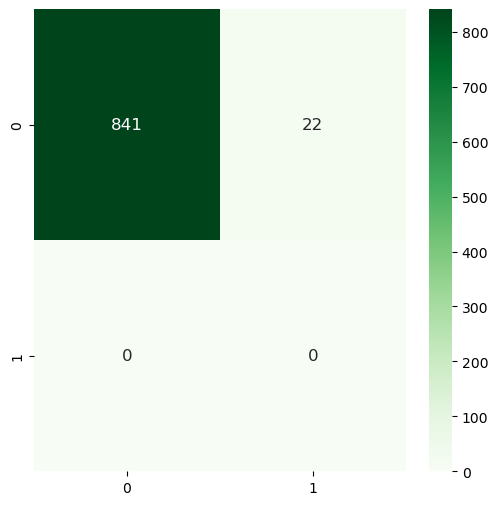

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
print(cm)
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g', annot_kws={"size": 12})
plt.savefig('RFCFischer2Feat.png')
plt.show()

In [50]:
############## Toplam data

In [51]:
X=data.copy()
y=data['death'].copy()

In [52]:
X=X.drop(columns=['id','recov','death'])

In [53]:
X

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,116,8,1,66.000000,1,0.0,17,31,23,12,3,1,8
1,113,8,0,56.000000,0,1.0,17,31,23,12,3,1,0
2,154,8,1,46.000000,0,1.0,17,31,23,12,3,1,13
3,129,8,0,60.000000,1,0.0,17,31,23,12,3,1,0
4,129,8,1,58.000000,0,0.0,17,31,23,12,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,53,3,2,24.000000,0,0.0,17,31,23,12,3,1,0
1081,0,0,2,35.000000,0,0.0,17,31,23,12,3,1,0
1082,3,1,1,49.483689,0,0.0,17,31,23,12,3,1,0
1083,25,9,1,49.483689,0,0.0,17,31,23,12,3,1,0


In [54]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1080    0
1081    0
1082    0
1083    0
1084    0
Name: death, Length: 1085, dtype: int64

In [89]:
y.value_counts()

death
0    1022
1      63
Name: count, dtype: int64

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(n_estimators=100, random_state=2)

In [91]:
rfc1.fit(Xtr.iloc[:,[7,8]],ytr)

RandomForestClassifier(random_state=2)

In [92]:
Xtr.iloc[:,[7,8]]

,symptom2,symptom3
48,31,23
49,31,23
50,31,23
51,31,23
52,31,23
...,...,...
1032,31,23
1033,31,23
1034,31,23
1035,31,23


In [93]:
X.iloc[:,[7,8]]

,symptom2,symptom3
0,31,23
1,31,23
2,31,23
3,31,23
4,31,23
...,...,...
1080,31,23
1081,31,23
1082,31,23
1083,31,23


In [94]:
predT=rfc1.predict(X.iloc[:,[7,8]])

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y, predT)

0.928110599078341

In [96]:
from sklearn.metrics import confusion_matrix
# creating a confusion matrix
cm = confusion_matrix(y, predT)
cm

array([[1003,   19],
       [  59,    4]], dtype=int64)

[[1003   19]
 [  59    4]]


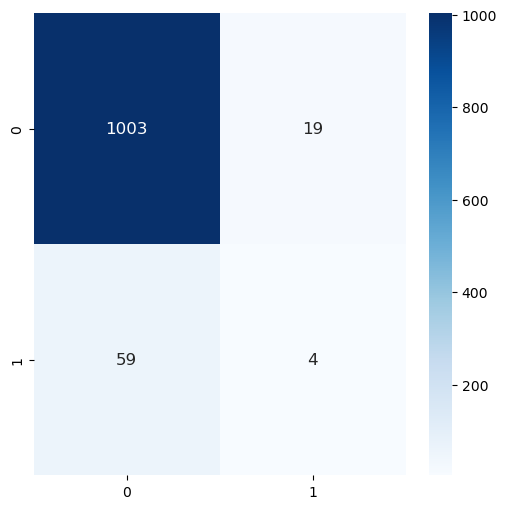

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
print(cm)
plt.figure(figsize = (6,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', annot_kws={"size": 12})
plt.savefig('RFCFischer2FeatAll.png')
plt.show()